<a href="https://colab.research.google.com/github/XiaoLiang28/Datamanagement/blob/main/ps5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions" (health, education, and the standard of living).(UNDP website)

In this project, I want to explore the relationship between the independent variables (life expectancy at birth, expected years of schooling, mean years of schooling, and GNI per capita) and the dependent variable (HDI).My hypothesis is all the four independent variables have positive correlations with the dependent variable, and the relationships are statistically significant.

Data from: https://hdr.undp.org/data-center/human-development-index#/indicies/HDI


# Set Up

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [ ]:
#---------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

# Data Import

In [ ]:
hdi=pd.read_excel("https://github.com/XiaoLiang28/Datamanagement/raw/main/Human%20Development%20Index(1)%20(1).xlsx")

In [ ]:
hdi = hdi.drop(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11'], axis=1)

In [ ]:
hdi.rename(columns={'Country ':'Country', 'Human Development Index (HDI) ':'HDI'},inplace=True)

In [ ]:
hdi

,HDI Rank,Country,HDI,Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Human Development
0,1,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540,Very High
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.106220,Very High
2,3,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810,Very High
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.845400,Very High
4,5,Australia,0.951,84.5265,21.054590,12.726820,49238.433350,Very High
...,...,...,...,...,...,...,...,...
186,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709,Low
187,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611,Low
188,189,Niger,0.400,61.5763,6.957112,2.116717,1239.866936,Low
189,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417,Low


In [ ]:
hdi.columns

Index(['HDI Rank', 'Country', 'HDI', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income (GNI) per capita', 'Human Development'],
      dtype='object')

## 1. General discription of the dataset

In [ ]:
print(hdi.head())

   HDI Rank                 Country    HDI  Life expectancy at birth  \
0         1             Switzerland  0.962                   83.9872   
1         2                  Norway  0.961                   83.2339   
2         3                 Iceland  0.959                   82.6782   
3         4  Hong Kong, China (SAR)  0.952                   85.4734   
4         5               Australia  0.951                   84.5265   

   Expected years of schooling  Mean years of schooling  \
0                    16.500299                 13.85966   
1                    18.185200                 13.00363   
2                    19.163059                 13.76717   
3                    17.278170                 12.22621   
4                    21.054590                 12.72682   

   Gross national income (GNI) per capita Human Development  
0                             66933.00454         Very High  
1                             64660.10622         Very High  
2                         

In [ ]:
print(hdi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI Rank                                191 non-null    int64  
 1   Country                                 191 non-null    object 
 2   HDI                                     191 non-null    float64
 3   Life expectancy at birth                191 non-null    float64
 4   Expected years of schooling             191 non-null    float64
 5   Mean years of schooling                 191 non-null    float64
 6   Gross national income (GNI) per capita  191 non-null    float64
 7   Human Development                       191 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 12.1+ KB
None


In [ ]:
print(hdi.describe())

         HDI Rank         HDI  Life expectancy at birth  \
count  191.000000  191.000000                 191.00000   
mean    95.811518    0.720576                  71.31286   
std     55.307333    0.150661                   7.64596   
min      1.000000    0.385000                  52.52540   
25%     48.500000    0.599500                  65.74720   
50%     96.000000    0.739000                  71.69400   
75%    143.500000    0.835000                  76.69930   
max    191.000000    0.962000                  85.47340   

       Expected years of schooling  Mean years of schooling  \
count                   191.000000               191.000000   
mean                     13.534658                 8.986916   
std                       2.923911                 3.173693   
min                       5.542510                 2.114962   
25%                      11.601258                 6.251659   
50%                      13.404920                 9.306864   
75%                      15

In [ ]:
print(hdi.shape)

(191, 8)


In [ ]:
longest_living = hdi[hdi['Life expectancy at birth'] == hdi['Life expectancy at birth'].max()][['Country', 'Life expectancy at birth']]
shortest_living = hdi[hdi['Life expectancy at birth'] == hdi['Life expectancy at birth'].min()][['Country', 'Life expectancy at birth']]
longest_living
shortest_living

,Country,Life expectancy at birth
3,"Hong Kong, China (SAR)",85.4734


,Country,Life expectancy at birth
189,Chad,52.5254


In [ ]:
longest_schooling = hdi[hdi['Expected years of schooling'] == hdi['Expected years of schooling'].max()][['Country', 'Expected years of schooling']]
shortest_schooling = hdi[hdi['Expected years of schooling'] == hdi['Expected years of schooling'].min()][['Country', 'Expected years of schooling']]
longest_schooling
shortest_schooling

,Country,Expected years of schooling
4,Australia,21.05459


,Country,Expected years of schooling
190,South Sudan,5.54251


In [ ]:
ProfileReport(hdi, title="HDI Summary")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
hdi.dtypes

HDI Rank                                    int64
Country                                    object
HDI                                       float64
Life expectancy at birth                  float64
Expected years of schooling               float64
Mean years of schooling                   float64
Gross national income (GNI) per capita    float64
Human Development                          object
dtype: object

In [ ]:
hdi.rename(columns={'Life expectancy at birth':'Life', 'Expected years of schooling':'ExpectedSchooling'},inplace=True)

In [ ]:
hdi.query("Life > 75 & ExpectedSchooling < 10")

,HDI Rank,Country,HDI,Life,ExpectedSchooling,Mean years of schooling,Gross national income (GNI) per capita,Human Development


In [ ]:
hdi.query("Life > 75 & ExpectedSchooling < 15")

,HDI Rank,Country,HDI,Life,ExpectedSchooling,Mean years of schooling,Gross national income (GNI) per capita,Human Development
16,17,Luxembourg,0.930,82.6287,14.398140,13.015192,84649.474670,Very High
39,40,Andorra,0.858,80.3684,13.300239,10.555120,51166.626610,Very High
42,42,Qatar,0.855,79.2716,12.637220,9.996011,87134.134690,Very High
43,44,San Marino,0.853,80.8786,12.266140,10.801460,52653.825340,Very High
60,61,Panama,0.805,76.2233,13.057879,10.540590,26956.837070,Very High
66,67,Albania,0.796,76.4626,14.448000,11.286455,14131.110390,High
70,71,Antigua and Barbuda,0.788,78.4968,14.184626,9.293741,16792.365950,High
72,73,Sri Lanka,0.782,76.3991,14.139905,10.827300,12578.220550,High
73,74,Bosnia and Herzegovina,0.780,75.3003,13.800000,10.536320,15241.914650,High
78,79,China,0.768,78.2107,14.236115,7.600118,17504.399690,High


## 2. Data Analysis

### Standard deviations

In [ ]:
variables = ['Life', 'ExpectedSchooling', 'Mean years of schooling', 'Gross national income (GNI) per capita']

In [ ]:
std_dev = hdi[variables].std()

In [ ]:
print(std_dev)

Life                                          7.645960
ExpectedSchooling                             2.923911
Mean years of schooling                       3.173693
Gross national income (GNI) per capita    21825.277076
dtype: float64


The GNI per capita has the highest SD, indicating the greatest spread of the four independent variables. It shows that different countries performed significantly different in economic development.

### Correlations

In [ ]:
corr_hdi=hdi.select_dtypes(include=[np.number])

In [ ]:
corr=corr_hdi.corr()['HDI'].drop('HDI')
print(corr)

HDI Rank                                 -0.992091
Life                                      0.905964
ExpectedSchooling                         0.895600
Mean years of schooling                   0.909126
Gross national income (GNI) per capita    0.788036
Name: HDI, dtype: float64


The correlations show that all four independent variables has a positive relationship with the dependent variable.  

### OLS Model

In [ ]:
import statsmodels.api as sm

In [ ]:
dependent = 'HDI'
independent = hdi[['Life', 'ExpectedSchooling', 'Mean years of schooling',
                    'Gross national income (GNI) per capita']]

In [ ]:
x = hdi[dependent]
#y = hdi['independent']
#x = sm.add_constant(x)
result = sm.OLS(x, independent).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    HDI   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.869e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                   6.12e-281
Time:                        20:36:34   Log-Likelihood:                          451.17
No. Observations:                 191   AIC:                                     -894.3
Df Residuals:                     187   BIC:                                     -881.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

All p values are zero, indicating that we can reject the null hypothesis. They are all statistically significant. And the R-squared is 0.999, indicating that 99.9% of HDI is explained by the model.

## Visualization

<Axes: xlabel='Country'>

Text(0.5, 0, 'Countries')

Text(0, 0.5, 'HDI')

Text(0.5, 1.0, 'Top 20 Best Human Development Countries')

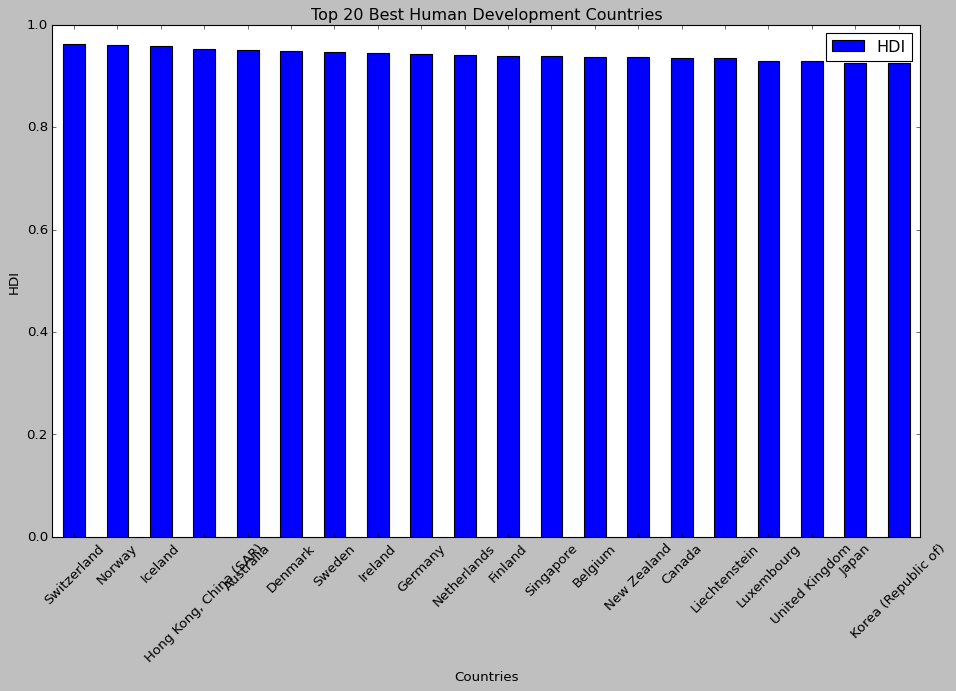

In [ ]:
top_20 = hdi.sort_values(by='HDI', ascending=False).head(20)
top_20.plot('Country', 'HDI', kind='bar', figsize=(14,8), rot=45)

plt.xlabel('Countries')
plt.ylabel('HDI')
plt.title('Top 20 Best Human Development Countries')

<Axes: xlabel='Country'>

Text(0.5, 0, 'Countries')

Text(0, 0.5, 'GNI')

Text(0.5, 1.0, 'Top 20 Countries with Highest GNI')

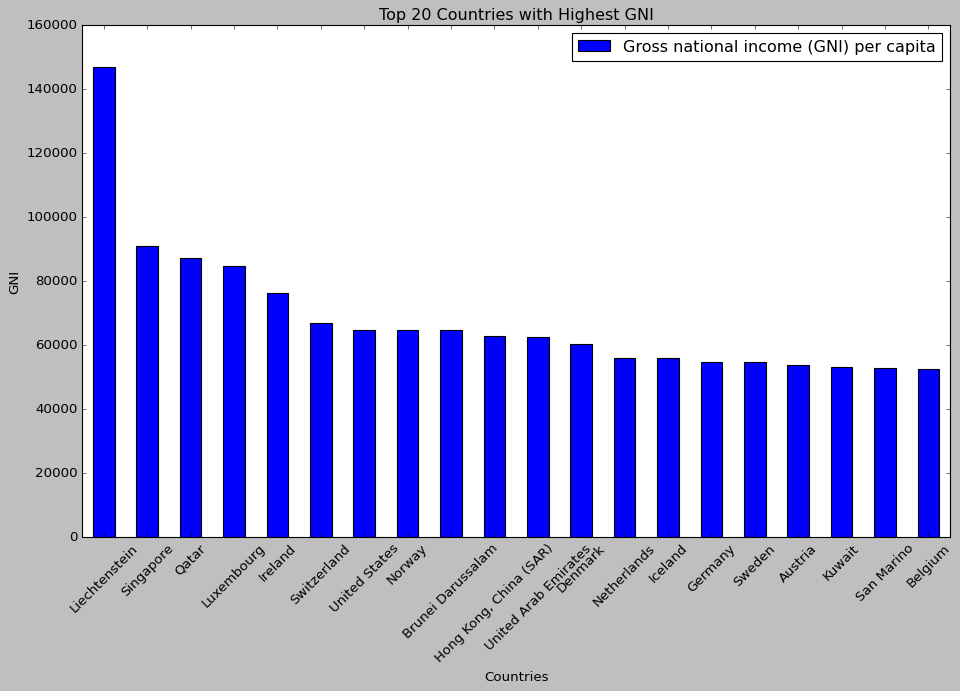

In [ ]:
GNI_highest_20 = hdi.sort_values(by='Gross national income (GNI) per capita', ascending=False).head(20)
GNI_highest_20.plot('Country', 'Gross national income (GNI) per capita', kind='bar', figsize=(14,8), rot=45)

plt.xlabel('Countries')
plt.ylabel('GNI')
plt.title('Top 20 Countries with Highest GNI')

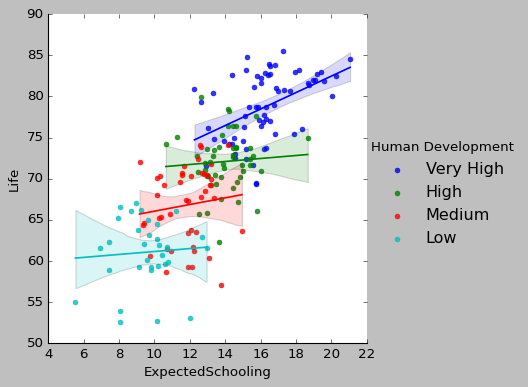

In [ ]:
sns.lmplot(data=hdi,x='ExpectedSchooling',y='Life',hue='Human Development')

# Future Directions

More years' data can be added in. And some other variables, like political and economic freedom, and gender issues, may also be considered in my next ps.